## Correlation Between International and Domestic Gross and Passing the Bechdel Test

This lab explores the correation between the overall gross of movies and wether or not they pass the Bechdel Test.  This correlation is explored by calculating average gross for passing movies and failing movies, along with calculating pearson r correlation coefficents for these variables.  This data is then divided into the reason for pass / fail, and these same values are again calculated.  This creates a more in-depth exploration into this correaltion, and which, if any, factors affect the correlation.

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 23 13:55:19 2016

@author: mikebaldwin
"""

import csv
import statistics
import matplotlib.pyplot as plt
import scipy.stats as st
import random as rand
%matplotlib inline

with open('movies.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
    
f = open('movies.csv', 'r')
failures = []
failures_binary_list = []
money = []
money_fail = []
money_pass = []
csv_f = csv.reader(f)
for row in csv_f :
    thisFail = row[5]
    if(row[11]!="domgross_2013$" and row[12]!="intgross_2013$"):
            thisMoney = int(row[11])+int(row[12])
     
            
            failures.append(thisFail)
            money.append(thisMoney)
            if(thisFail == "FAIL"):
                money_fail.append(thisMoney)
                failures_binary_list.append(0)
            elif(thisFail == "PASS"):
                money_pass.append(thisMoney)
                failures_binary_list.append(1)
            
    

## get some averages

fail_money = statistics.mean(money_fail)
pass_money = statistics.mean(money_pass)
print("Mean income from movies that fail the test: $",fail_money)
print("Mean income from movies that pass the test: $",pass_money)


Observing the income of movies which pass and fail the Bechdel Test, it appears that movies which fail the Bechdel Test gross an average of $83,221,100 more combined domestically and internationally.  However, before accepting this data, it is important to confirm the correaltion between the two variables. 

The correlation between gross income and if the movie passed or failed is -0.102591387646


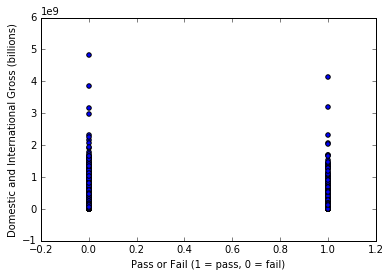

In [35]:
##get some correlations

#correlation between money and if the movie passed or failed (binary)
pearson = st.pearsonr(failures_binary_list, money)
plt.scatter(failures_binary_list, money)
print("The correlation between gross income and if the movie passed or failed is", pearson[0])
plt.xlabel("Pass or Fail (1 = pass, 0 = fail)")
plt.ylabel("Domestic and International Gross (billions)")


Observing the correlation coefficent, and the scatterplot of gross income and pass/fail of the test, the data supports the conclusion that there is little to no correaltion betweenn gross income and passing or failing the Bechdel Test.  As seen in the scatterplot, there are movies of all gross incomes which pass the Bechdel Test, and there are movies of all gross incomes which fail the Bechdel Test.  The correaltion coefficent points towards there being little correlation between gross and passage of the Bechdel Test.

To confirm this conclusion, we will look at this same problem, but with all outputs taken (pass, men, notalk, nowomen)

Mean income from movies that recieve 'ok': $ 247728389.0352645
Mean income from movies that recieve 'men': $ 287950320.02072537
    Difference from ok: million $ 40.2219
Mean income from movies that recieve 'notalk': $ 355660038.08235294
    Difference from ok: million $ 107.9316
Mean income from movies that recieve 'nowomen': $ 306738676.1956522
    Difference from ok: million $ 59.0103


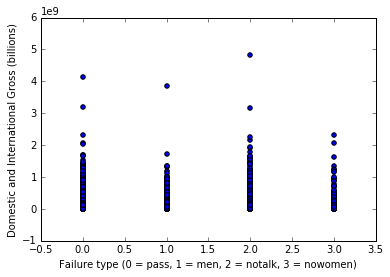

In [27]:
f = open('movies.csv', 'r')

#money per category
ok_money = []
men_money = []
notalk_money = []
nowomen_money = []
#overall money
money = []
#if the moive passed or failed
failures_binary = []



#disagreement correlation
disagree = []
disagree_money = []
agree_money = []


csv_f = csv.reader(f)
for row in csv_f :
    thisFail = row[4]
    thisDisagree = row[3]
    if(row[11]!="domgross_2013$" and row[12]!="intgross_2013$"):
            thisMoney = int(row[11])+int(row[12])
            #do not consider dubious ratings, this data is too hard interpert and not conclusive
            if "dubious" not in thisFail:
                if "disagree" not in thisDisagree:
                    disagree.append(0)
                    agree_money.append(thisMoney)
                else:
                    disagree.append(1)
                    disagree_money.append(thisMoney)

    
            if(thisFail == "ok"):
                money.append(thisMoney)
                ok_money.append(thisMoney)
                failures_binary.append(0)
            elif(thisFail == "men"):
                money.append(thisMoney)
                men_money.append(thisMoney)
                failures_binary.append(1)
            elif(thisFail == "notalk"):
                money.append(thisMoney)
                notalk_money.append(thisMoney)
                failures_binary.append(2)
            elif(thisFail == "nowomen"):
                money.append(thisMoney)
                nowomen_money.append(thisMoney)
                failures_binary.append(3)
      
# plot what type of test result was given, and the movie's gross income
plt.scatter(failures_binary, money)
plt.xlabel("Failure type (0 = pass, 1 = men, 2 = notalk, 3 = nowomen)")
plt.ylabel("Domestic and International Gross (billions)")

#calculate averages
print("Mean income from movies that recieve 'ok': $",statistics.mean(ok_money))
print("Mean income from movies that recieve 'men': $",statistics.mean(men_money))
print("    Difference from ok: million $", round(abs(statistics.mean(ok_money) - statistics.mean(men_money))/1000000, 4))
print("Mean income from movies that recieve 'notalk': $",statistics.mean(notalk_money))
print("    Difference from ok: million $", round(abs(statistics.mean(ok_money) - statistics.mean(notalk_money))/1000000, 4))
print("Mean income from movies that recieve 'nowomen': $",statistics.mean(nowomen_money))
print("    Difference from ok: million $", round(abs(statistics.mean(ok_money) - statistics.mean(nowomen_money))/1000000, 4))

From this data we can see that movies that fail the Bechdel Test actually have a higher overall gross than movies that pass, with the highest grossing movies on average being movies where there are female characters that do not have speaking lines, which make on average $107 million dollars more than the average movie that pass the Bechdel Test.  This appears to show that movies that fail the test make more money than movies that pass.  This leads me to conclude that pearson r of binary passing and failing is a bad indicator between the correlation between gross and passing or failing the Bechdel Test.

Next we will observe if disagreement on the rating of the movie has any correlation to domestic and international gross

In [32]:
#calc means
disagree_avg = statistics.mean(disagree_money)
agree_avg = statistics.mean(agree_money)

print("Average gross for movies where judgement is debated: $", disagree_avg)
print("Average gross for movies where judgement is agreed: $", agree_avg)

#calc correaltion between disagreeing and making money
pearson_disagree = st.pearsonr(disagree, money)
print("Correaltion between gross and if the judgement is disagreed upon:", pearson_disagree[0])


Average gross for movies where judgement is debated: $ 454982504.6831956
Average gross for movies where judgement is agreed: $ 244362154.2413522
Correaltion between gross and if the judgement is disagreed upon: 0.219072516438


This shows that there is a possible correlation between if the judgement is debated or not, and the gross of the movie. Movies that are debated seem to make almost double the gross as movies that are agreed upon.  While the Pearson Correlation Coefficent of this data is not signifagent, there is a slight correlation of around 0.22, which is somewhat correlated.

This may be because movies that have a higher gross are seen by more people, and therefore will get more ratings in the Bechdel Test database.  This means there is a higher chance a user may disagree with an opinon in a larger sample, leading to an increased amount of disagreement on movies with a higher gross. 

One way to test this correlation is to look at the ratings of the top grossing movies from the dataset, and to see what percentage of these movies passed the Bechdel Test

In [45]:
#get the indexes of the top 100 grossing movies so we can see if they pass or fail
top_300_index = sorted(range(len(money)), key=lambda i: money[i])[-500:]

pass_movies = []
fail_movies = []

for i in range(len(top_300_index)):
    if(failures_binary_list[top_300_index[i]] == 0):
        fail_movies.append(money[top_300_index[i]])
    elif(failures_binary_list[top_300_index[i]] == 1):
        pass_movies.append(money[top_300_index[i]])
        
#count number of passing and failing movies
passed = len(pass_movies)
failed = len(fail_movies)

print("Percent of movies in top 300 grossing that pass the Bechdel Test: %", passed/5)


Percent of movies in top 300 grossing that pass the Bechdel Test: % 37.6


This percentage leads me to believe that there is a correlation between gross and passing the Bechdel Test.  Movies that fail the Bechdel Test seem to have a higher gross overall, with movies that pass the test making less money.

## Conclusion

From this exploration, it can be stated that there is evidence to support a correlation between a movie failing the Bechdel Test, and having a higher overall gross.  This same conclusion can be found for every reason for failure, with movies where women talk only about men having the largest difference, at over $107 million dollars higher average gross.  While pearson r correlation coefficents do not show statistically signifagent results, they do show slight correlaions in most categories.  This slight correlation provides insight to an underlying correlation hidden deep between the two variables.

The exploration of disagreement correaltion to gross provides a view to possible lurking variables behind our data.  Movies that have disagreement on their test results show near doubled average grossing over movies where the test result is confirmed.

In order to further confirm the results that there is indeed correlation between gross and Bechdel Test results, the percentage of movies in the top 300 grossing movies that passed the test were examined.  In calculations, it was determined that only 37% of movies in these top 300 passed the test, providing further evidence that the Bechdel Test may be correlated to the overall gross of a movie.

In conclusion, there is evidence that supports a correlation between gross of a movie and if it passes the Bechdel Test.  Looking at the data collected, we can conclude that their is most likely a correlation between an increased gross and failure of the Bechdel Test.  This conclusion remains true through multiple tests, with evidence in tests observing why the movie failed, and observing the amount of the top 300 grossing movies which fail the Bechdel Test.  From this information I found that this conclusion is most likely true, based on the tests I preformed.